In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
### Run on CCL Kernal!!!

In [3]:
import pandas as pd
import astropy
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from astropy.table import Table
from matplotlib.patches import Circle
import math
from mpl_toolkits.basemap import Basemap

In [4]:
dataPath = '/Users/megantabbutt/CosmologyDataProducts/'

In [5]:
'''
Convert from PanSTARRS data where RA is in "u.hourangle" and DEC is in "u.deg" to just degrees
 @Param Dataframe     is the panstarrs dataframe to convert
 @Param newDataFrame  is the new data frame you will fill in 
 --- FIX: could be improved to be more versitile
'''
def getRADecFromHourAngles(Dataframe, newDataFrame):
    for i, row in Dataframe.iterrows():
        Coords = SkyCoord(PanSTARRS['RA'][i], PanSTARRS['Dec'][i], unit=(u.hourangle, u.deg))
        newDataFrame['ID'][i] = row['ID']
        newDataFrame['RA'][i] = Coords.ra.degree
        newDataFrame['DEC'][i] = Coords.dec.degree 
        newDataFrame['zSN'][i] = row['zSN']
        newDataFrame['zHost'][i] = row['zHost']
        
'''Make bin widths for histograms for redshift 
@Param width   is the size of the bin in redshift
@Param ending  is the ending redshift
Note: It starts at zero redhsift always
--- FIX: a starting value with a defualt set to zero instead 
'''
def makeBins(width, ending):
    binWidths = []
    num = ending/width
    num = int(num+1)
    for i in range(num):
        edge = i * width
        binWidths.append(edge)
    return binWidths

In [6]:
CMASSLOWZTOT_North_Tbl = Table.read(dataPath + 'galaxy_DR12v5_CMASSLOWZTOT_North.fits', format='fits')
del CMASSLOWZTOT_North_Tbl['FRACPSF', 'EXPFLUX', 'DEVFLUX', 'PSFFLUX', 'MODELFLUX', 'FIBER2FLUX', 'R_DEV', 'EXTINCTION', 
                           'PSF_FWHM', 'SKYFLUX', 'IMAGE_DEPTH', 'TILE', 'RERUN', 'CAMCOL', 'FIELD', 'ID', 'ICHUNK', 'RUN', 
                          'IPOLY', 'AIRMASS', 'EB_MINUS_V', 'IMATCH', 'WEIGHT_FKP', 'WEIGHT_CP', 'WEIGHT_NOZ', 'WEIGHT_STAR',
                          'WEIGHT_SEEING', 'WEIGHT_SYSTOT', 'COMP', 'PLATE', 'FIBERID', 'MJD', 'FINALN', 'SPECTILE', 'ICOLLIDED', 
                          'INGROUP', 'MULTGROUP', 'ISECT']
CMASSLOWZTOT_North_DF = CMASSLOWZTOT_North_Tbl.to_pandas()
CMASSLOWZTOT_North_DF.head(3)

,RA,DEC,Z,NZ
0,195.071285,-0.590771,0.465648,0.000345
1,195.022992,-0.610999,0.565802,0.000319
2,195.079741,0.348981,0.612211,0.000191


In [7]:
CMASSLOWZTOT_South_Tbl = Table.read(dataPath + 'galaxy_DR12v5_CMASSLOWZTOT_South.fits', format='fits')
del CMASSLOWZTOT_South_Tbl['FRACPSF', 'EXPFLUX', 'DEVFLUX', 'PSFFLUX', 'MODELFLUX', 'FIBER2FLUX', 'R_DEV', 'EXTINCTION', 
                           'PSF_FWHM', 'SKYFLUX', 'IMAGE_DEPTH', 'TILE', 'RERUN', 'CAMCOL', 'FIELD', 'ID', 'ICHUNK', 'RUN', 
                          'IPOLY', 'AIRMASS', 'EB_MINUS_V', 'IMATCH', 'WEIGHT_FKP', 'WEIGHT_CP', 'WEIGHT_NOZ', 'WEIGHT_STAR',
                          'WEIGHT_SEEING', 'WEIGHT_SYSTOT', 'COMP', 'PLATE', 'FIBERID', 'MJD', 'FINALN', 'SPECTILE', 'ICOLLIDED', 
                          'INGROUP', 'MULTGROUP', 'ISECT']
CMASSLOWZTOT_South_DF = CMASSLOWZTOT_South_Tbl.to_pandas()
CMASSLOWZTOT_South_DF.head(3)

,RA,DEC,Z,NZ
0,321.480329,9.973440,0.301401,0.000390
1,321.359691,9.933358,0.458872,0.000350
2,322.614181,10.144496,0.579383,0.000273


In [8]:
PanSTARRS = pd.read_json('PanSTARRS SNe Data/PanSTARRS_Data.json', orient='columns')
PanSTARRS.head(3)

,ID,RA,Dec,RAHost,DecHost,zHost,NormSep,TDR,zSource,zSN,...,e_c,mB,e_mB,logM,e_logM,distcorr,PIa_PSNID,PIa_NN,PIa_Fitprob,PIa_Galsnid
0,ps0909006,22:15:48.000,01:11:05.39,22:15:47.993,+01:11:05.20,-999.0,-999.0,-999.0,-999,0.284,...,0.0481,21.5094,0.0702,-999.0,-999.0,0.012,1.0,1.0,1.0,1.0
1,ps0909010,02:28:28.368,-04:04:44.08,02:28:28.432,-04:04:44.54,-999.0,-999.0,-999.0,-999,0.270,...,0.0328,21.1796,0.0383,-999.0,-999.0,0.011,1.0,1.0,1.0,1.0
2,ps0910017,02:21:06.600,-05:01:23.84,-999,-999,-999.0,-999.0,-999.0,-999,0.320,...,0.0372,21.4279,0.0499,-999.0,-999.0,0.015,1.0,1.0,1.0,1.0


In [9]:
PanSTARRSNEW = pd.DataFrame(columns = ['ID', 'RA', 'DEC', 'zSN', 'zHost'], index=PanSTARRS.index)
getRADecFromHourAngles(PanSTARRS, PanSTARRSNEW) 
PanSTARRSNEW.head(3)

,ID,RA,DEC,zSN,zHost
0,ps0909006,333.95,1.18483,0.284,-999
1,ps0909010,37.1182,-4.07891,0.27,-999
2,ps0910017,35.2775,-5.02329,0.32,-999


In [10]:
# --- FIX: check to see if the doc exists and if not, make connection

connBOSS = sqlite3.connect('CMASS_and_LOWZ.db')
#CMASSLOWZTOT_South_DF.to_sql("CMASSLOWZTOT_South", con=connBOSS)
#CMASSLOWZTOT_North_DF.to_sql("CMASSLOWZTOT_North", con=connBOSS)

connPAN = sqlite3.connect('PanSTARRS.db')
#PanSTARRSNEW.to_sql("PanSTARRSNEW", con=connPAN)

In [11]:
qry = "SELECT * FROM CMASSLOWZTOT_South UNION SELECT * FROM CMASSLOWZTOT_North"
CMASSLOWZTOT_DF = pd.read_sql(qry, con=connBOSS)
CMASSLOWZTOT_DF.head(3)

,index,RA,DEC,Z,NZ
0,0,195.071285,-0.590771,0.465648,0.000345
1,0,321.480329,9.973440,0.301401,0.000390
2,1,195.022992,-0.610999,0.565802,0.000319


In [12]:
qry = "SELECT * FROM PanSTARRSNEW"
PanSTARRSNEW_DF = pd.read_sql(qry, con=connPAN)
PanSTARRSNEW_DF.head(3)

,index,ID,RA,DEC,zSN,zHost
0,0,ps0909006,333.9500,1.184831,0.284,-999.0
1,1,ps0909010,37.1182,-4.078911,0.270,-999.0
2,10,psc000091,129.3289,44.333731,0.152,-999.0


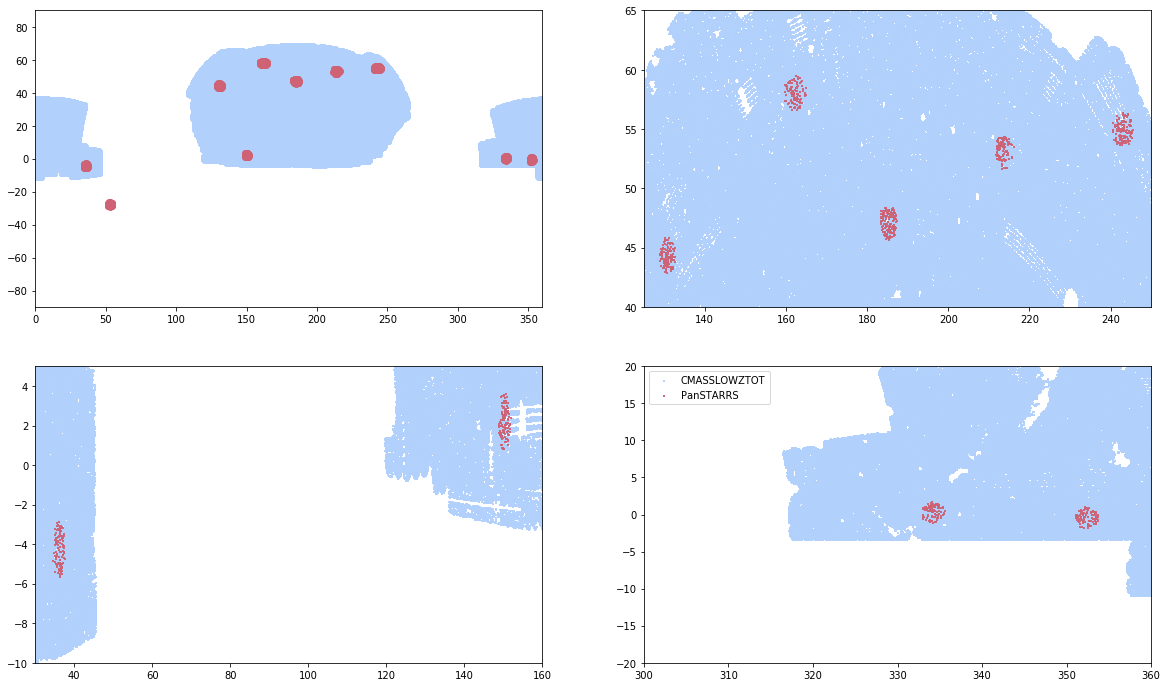

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

ax[0,0].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT')
ax[0,0].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS')
ax[0,0].set_xlim(0, 360)
ax[0,0].set_ylim(-90, 90)

ax[0,1].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[0,1].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker=',', s=1)
ax[0,1].set_xlim(125, 250)
ax[0,1].set_ylim(40, 65)

ax[1,0].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[1,0].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker=',', s=1)
ax[1,0].set_xlim(30, 160)
ax[1,0].set_ylim(-10, 5)

ax[1,1].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[1,1].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker=',', s=1)
ax[1,1].set_xlim(300, 360)
ax[1,1].set_ylim(-20, 20)

plt.legend()
#plt.savefig("PanSTARRS and CMASSLOWZ angle overlap")

Text(0.5, 0.98, 'Footprint of CMASS_LOWZ BOSS and PanSTARRS SNe')

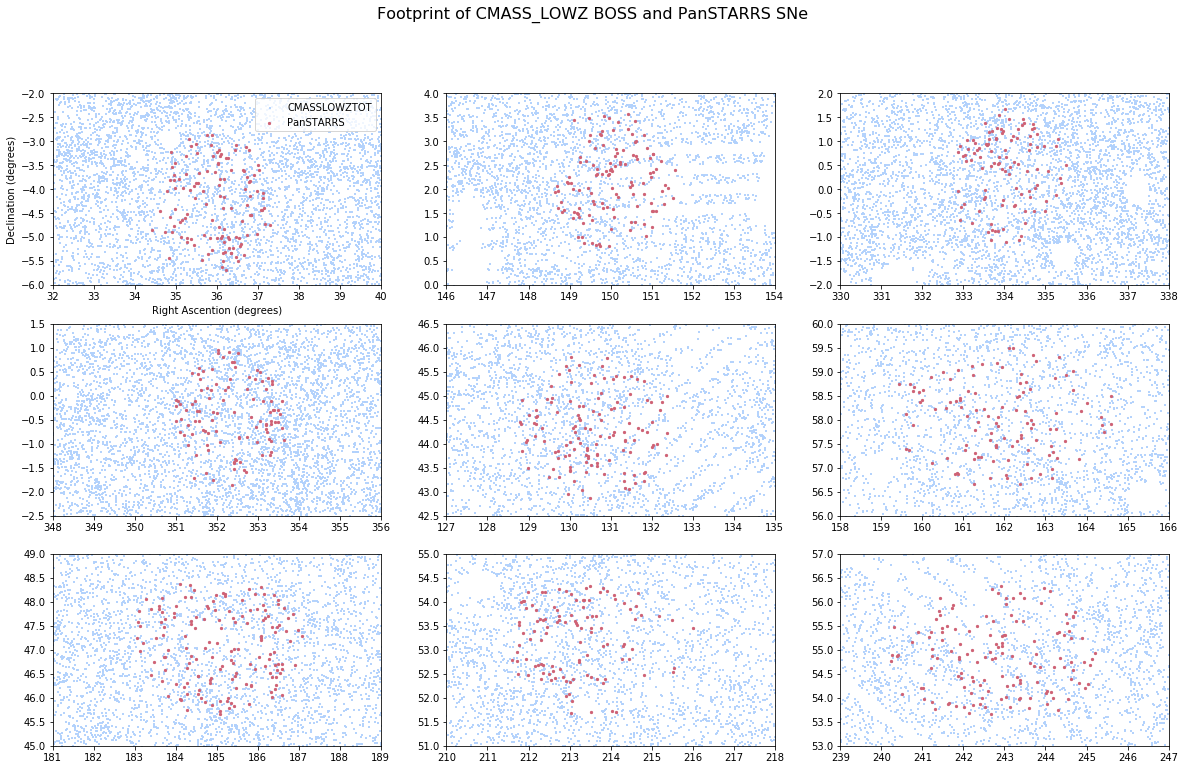

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

ax[0,0].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[0,0].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[0,0].set_xlim(32, 40)
ax[0,0].set_ylim(-6, -2)
ax[0,0].set_xlabel("Right Ascention (degrees)")
ax[0,0].set_ylabel("Declination (degrees)")
ax[0,0].legend(loc="upper right")

ax[0,1].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[0,1].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[0,1].set_xlim(146, 154)
ax[0,1].set_ylim(0, 4)

ax[0,2].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[0,2].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[0,2].set_xlim(330, 338)
ax[0,2].set_ylim(-2, 2)

ax[1,0].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[1,0].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[1,0].set_xlim(348, 356)
ax[1,0].set_ylim(-2.5, 1.5)

ax[1,1].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[1,1].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[1,1].set_xlim(127, 135)
ax[1,1].set_ylim(42.5, 46.5)

ax[1,2].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[1,2].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[1,2].set_xlim(158, 166)
ax[1,2].set_ylim(56, 60)

ax[2,0].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[2,0].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[2,0].set_xlim(181, 189)
ax[2,0].set_ylim(45, 49)

ax[2,1].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[2,1].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[2,1].set_xlim(210, 218)
ax[2,1].set_ylim(51, 55)

ax[2,2].scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', marker=',', s=1)
ax[2,2].scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', marker='o', s=5)
ax[2,2].set_xlim(239, 247)
ax[2,2].set_ylim(53, 57)

fig.suptitle('Footprint of CMASS_LOWZ BOSS and PanSTARRS SNe', fontsize=16)
#plt.savefig("PanSTARRS and CMASSLOWZ angle overlap zoom")

In [15]:
qry = "SELECT zSN, zHost FROM PanSTARRSNEW WHERE (zSN > -999) || (zHost > -999)"
PanSTARRSNEW_z = pd.read_sql(qry, con=connPAN)
PanSTARRSNEW_z.head(3)

,zSN,zHost
0,0.284,-999.0
1,0.270,-999.0
2,0.152,-999.0


In [16]:
PanSTARRS_z_data = []
for i, row in PanSTARRSNEW_z.iterrows():
    if row['zSN'] != -999:
        PanSTARRS_z_data.append(row['zSN'])
    else:
        PanSTARRS_z_data.append(row['zHost'])
#PanSTARRS_z_data 

In [17]:
qry = 'SELECT Z FROM CMASSLOWZTOT_South UNION SELECT Z FROM CMASSLOWZTOT_North'
CMASSLOWZTOT_Z = pd.read_sql(qry, con=connBOSS)
CMASSLOWZTOT_Z.head(3)

,Z
0,-0.011447
1,-0.009278
2,-0.007680


In [18]:
CMASSLOWZTOT_z_data = CMASSLOWZTOT_Z['Z'].tolist()
#CMASSLOWZTOT_z_data

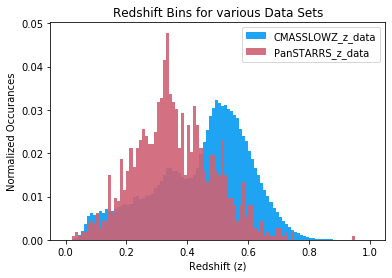

In [19]:
bin_widths = makeBins(width=.01, ending=1.0) 

weightsCMASS = np.ones_like(CMASSLOWZTOT_z_data)/float(len(CMASSLOWZTOT_z_data))
weightsPAN = np.ones_like(PanSTARRS_z_data)/float(len(PanSTARRS_z_data))

plt.hist(CMASSLOWZTOT_z_data, bin_widths, label="CMASSLOWZ_z_data", weights=weightsCMASS, color='#069af3', alpha=.9)
plt.hist(PanSTARRS_z_data, bin_widths, label="PanSTARRS_z_data", weights=weightsPAN, color='#cf6275', alpha=0.9)
plt.title("Redshift Bins for various Data Sets")
plt.ylabel("Normalized Occurances")
plt.xlabel("Redshift (z)")
plt.legend()
#plt.savefig('Normalized occurances for CMASSLOWZ and PanSTARRS SNe')
print(" ")

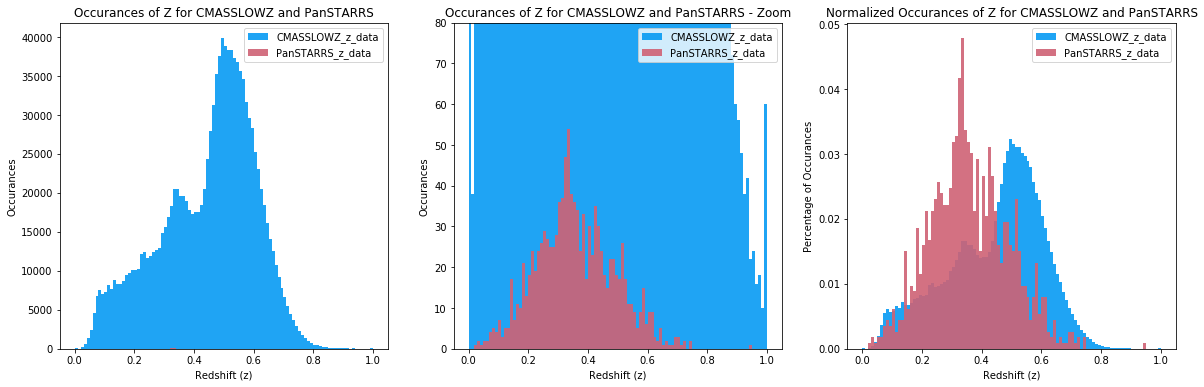

In [20]:
bin_widths = makeBins(width=.01, ending=1.0) 
weightsCMASS = np.ones_like(CMASSLOWZTOT_z_data)/float(len(CMASSLOWZTOT_z_data))
weightsPAN = np.ones_like(PanSTARRS_z_data)/float(len(PanSTARRS_z_data))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

ax[0].hist(CMASSLOWZTOT_z_data, bin_widths, label="CMASSLOWZ_z_data", color='#069af3', alpha=.9)
ax[0].hist(PanSTARRS_z_data, bin_widths, label="PanSTARRS_z_data", color='#cf6275', alpha=0.9)
ax[0].set_title("Occurances of Z for CMASSLOWZ and PanSTARRS")
ax[0].set_ylabel("Occurances")
ax[0].set_xlabel("Redshift (z)")
ax[0].legend()

ax[1].hist(CMASSLOWZTOT_z_data, bin_widths, label="CMASSLOWZ_z_data", color='#069af3', alpha=.9)
ax[1].hist(PanSTARRS_z_data, bin_widths, label="PanSTARRS_z_data", color='#cf6275', alpha=0.9)
ax[1].set_title("Occurances of Z for CMASSLOWZ and PanSTARRS - Zoom")
ax[1].set_ylim(0, 80)
ax[1].set_ylabel("Occurances")
ax[1].set_xlabel("Redshift (z)")
ax[1].legend()

ax[2].hist(CMASSLOWZTOT_z_data, bin_widths, label="CMASSLOWZ_z_data", color='#069af3', alpha=.9, weights=weightsCMASS)
ax[2].hist(PanSTARRS_z_data, bin_widths, label="PanSTARRS_z_data", color='#cf6275', alpha=0.9, weights=weightsPAN)
ax[2].set_title("Normalized Occurances of Z for CMASSLOWZ and PanSTARRS")
ax[2].set_ylabel("Percentage of Occurances")
ax[2].set_xlabel("Redshift (z)")
ax[2].legend()

#plt.savefig('Histograms of CMASSLOWZ and PanSTARRS')
print(" ")

In [21]:
# https://arxiv.org/pdf/1310.3828.pdf - pointings details 
# MID DEEP FEILD POINTINGS:
pointings = {"MD01": [035.875, -04.250], "MD02": [053.100, -27.800], "MD03": [130.592, 44.317], 
             "MD04": [150.000, 02.200], "MD05": [161.917, 58.083], "MD06": [185.000, 47.117], 
             "MD07": [213.704, 53.083], "MD08": [242.787, 54.950], "MD09": [334.188, 00.283], "MD10": [352.312, -00.433]}

(-40, 70)

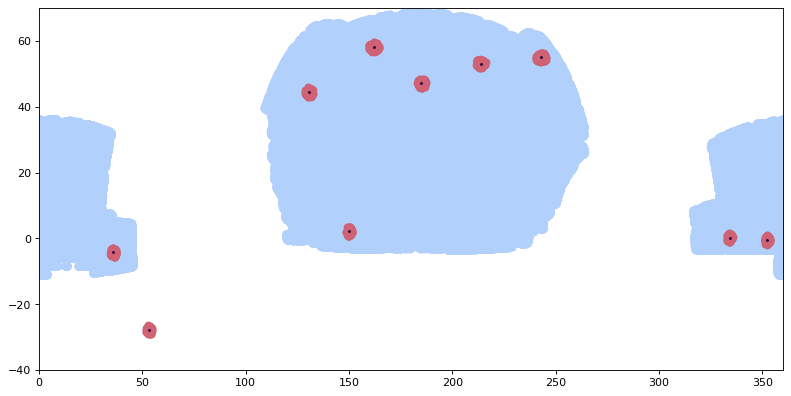

In [22]:
plt.figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

for pointing in pointings:
    plt.scatter(pointings[pointing][0], pointings[pointing][1], c='#35063e', 
                label='Pointing:' + str(pointing), marker='x', s=3, zorder=4)
plt.scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', zorder=1)
plt.scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', zorder=1)
plt.xlim(0, 360)
plt.ylim(-40, 70)

In [23]:
# Go really rough estimate first, have the pointings, make a circle around that. 
# Take area coverage as 7 sq degrees
# https://arxiv.org/pdf/1612.05560.pdf - camera details 

def findCircleAroundPointing(pointing, area):
    coords = pointings[pointing]
    circle = plt.Circle((coords[0], coords[1]), 3.3/2, alpha=.8, color='#b790d4', zorder=2, label='GPC1 Image Area')
    return circle
    
    
# FOV is 7 sq deg, but the diameter is 3.3, 3.3 would be 8.55 sq deg
#
findCircleAroundPointing('MD01', 7)

(-40, 70)

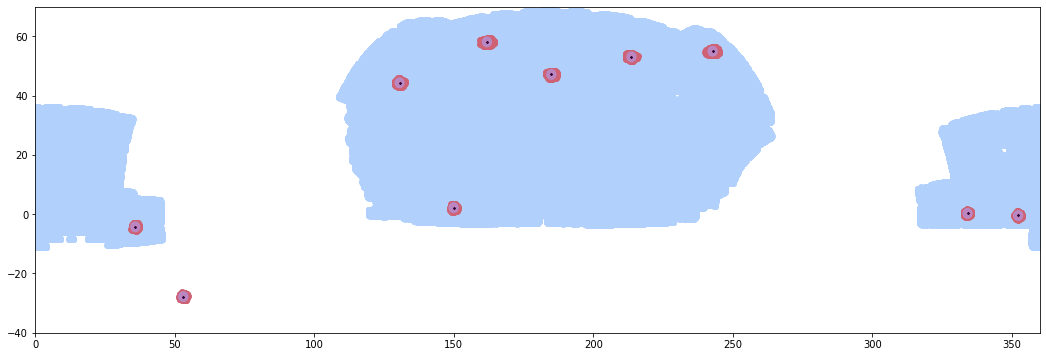

In [24]:
fig, ax = plt.subplots(figsize=(18, 6))
#plt.figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

for pointing in pointings:
    plt.scatter(pointings[pointing][0], pointings[pointing][1], c='#35063e', 
                label='Pointing:' + str(pointing), marker='x', s=3, zorder=4)
    circle = findCircleAroundPointing(pointing, 7)
    ax.add_artist(circle)
plt.scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', zorder=1)
plt.scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', zorder=1)
plt.xlim(0, 360)
plt.ylim(-40, 70)

In [25]:
# Want to make a loop to plot the 9 subplots:
pointingsList = []
for pointing in pointings:
    if pointing == "MD02":
        pass
    else:
        pointingsList.append(pointing)
pointingsList

['MD01', 'MD03', 'MD04', 'MD05', 'MD06', 'MD07', 'MD08', 'MD09', 'MD10']

Text(0.5, 0.98, 'Single camera size centered at pointing')

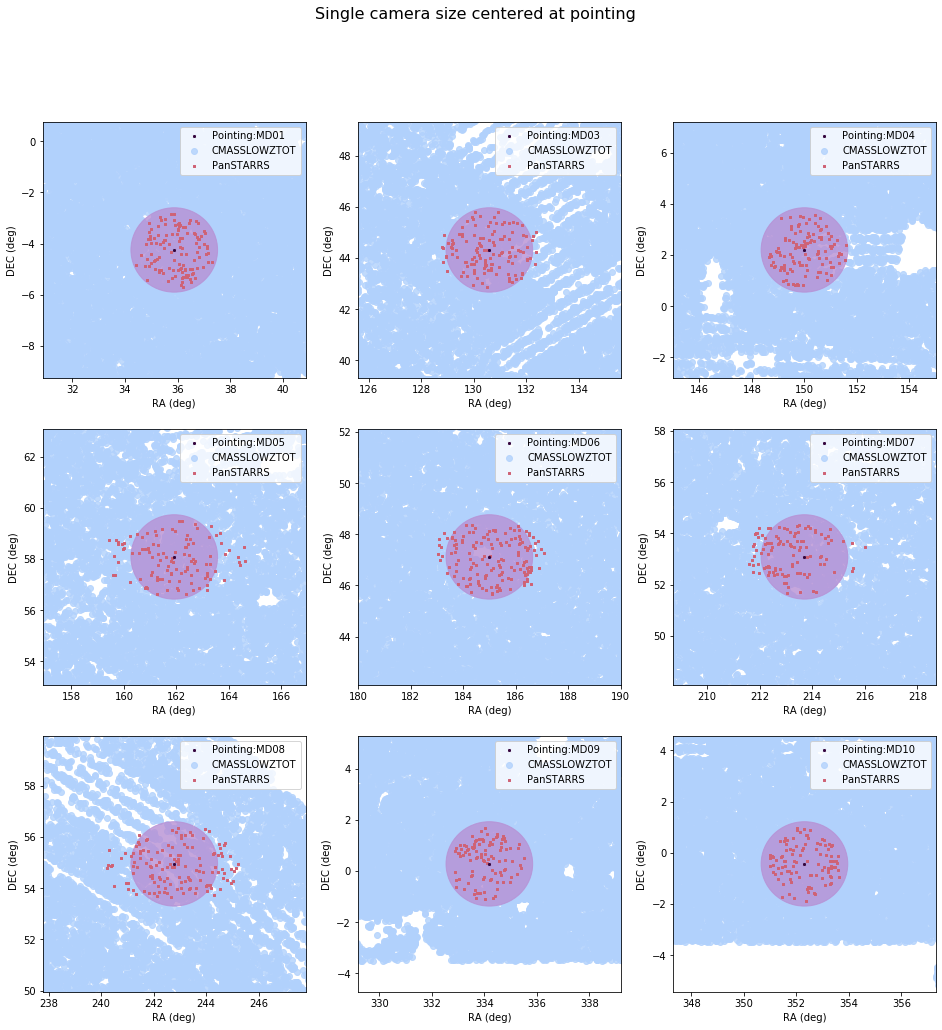

In [26]:
fig, axes = plt.subplots(3,3, sharex=False, sharey=False, figsize=(16, 16))

for i, ax in enumerate(axes.flatten()):
    pointing = pointingsList[i]
    ax.scatter(pointings[pointing][0], pointings[pointing][1], c='#35063e', 
                label='Pointing:' + str(pointing), marker='x', s=5, zorder=4)
    circle = findCircleAroundPointing(pointing, 7)
    ax.add_artist(circle)
    ax.scatter(CMASSLOWZTOT_DF['RA'], CMASSLOWZTOT_DF['DEC'], c='#b1d1fc', label='CMASSLOWZTOT', zorder=1, alpha=.8)
    ax.scatter(PanSTARRSNEW_DF['RA'], PanSTARRSNEW_DF['DEC'], c='#cf6275', label='PanSTARRS', zorder=3, marker=',', s=2)
    ax.set_xlim(pointings[pointing][0]-5, pointings[pointing][0]+5)
    ax.set_ylim(pointings[pointing][1]-5, pointings[pointing][1]+5)
    ax.legend(loc='upper right')
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('DEC (deg)')

fig.suptitle('Single camera size centered at pointing', fontsize=16)
#plt.savefig("PanSTARRS Mask attempt 1")

//miniconda3/envs/ccl/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


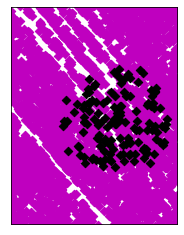

In [27]:
map = Basemap(llcrnrlon= 238,llcrnrlat= 52,urcrnrlon= 246, urcrnrlat= 58, 
                 projection= 'tmerc', lat_0= 55, lon_0= 242)

lons = np.array(CMASSLOWZTOT_DF['RA'])
lats = np.array(CMASSLOWZTOT_DF['DEC'])

plons = np.array(PanSTARRSNEW_DF['RA'])
plats = np.array(PanSTARRSNEW_DF['DEC'])

x, y = map(lons, lats)
xp, yp = map(plons, plats)

map.scatter(x, y, marker='D',color='m')
map.scatter(xp, yp, marker='D',color='k')


plt.show()

//miniconda3/envs/ccl/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


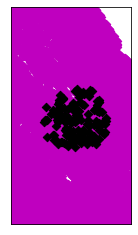

In [28]:
fig, ax = plt.subplots()

map = Basemap(llcrnrlon= 238, llcrnrlat= 50,urcrnrlon= 248, urcrnrlat= 60, 
                 projection= 'tmerc', lat_0= 55, lon_0= 242, ax=ax)

lons = np.array(CMASSLOWZTOT_DF['RA'])
lats = np.array(CMASSLOWZTOT_DF['DEC'])

plons = np.array(PanSTARRSNEW_DF['RA'])
plats = np.array(PanSTARRSNEW_DF['DEC'])

x, y = map(lons, lats)
xp, yp = map(plons, plats)

map.scatter(x, y, marker='D',color='m')
map.scatter(xp, yp, marker='D',color='k')

#circle = plt.Circle((242.787, 54.950), 3.3/2, alpha=.8, color='#b790d4', zorder=2, label='GPC1 Image Area')
#ax.add_artist(circle)

circle = Circle((242.787, 54.950), 3.3/2, alpha=.8, color='#b790d4')
ax.add_patch(circle)

plt.show()

In [29]:
connBOSS.close()
connPAN.close()